In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 16.2 MB/s 
     |████████████████████████████████| 163 kB 72.8 MB/s 
     |████████████████████████████████| 6.6 MB 64.6 MB/s 


In [6]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [7]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 16.0 MB/s 
     |████████████████████████████████| 431 kB 67.3 MB/s 
     |████████████████████████████████| 1.3 MB 61.9 MB/s 
     |████████████████████████████████| 115 kB 55.1 MB/s 
     |████████████████████████████████| 212 kB 72.8 MB/s 
     |████████████████████████████████| 127 kB 75.7 MB/s 
Mounted at /content/gdrive


In [8]:
from fastbook import *
from fastai.vision.widgets import *

In [9]:
from transformers import pipeline

In [10]:
path = Path('/content/gdrive/MyDrive/emotion-detection/data/train')

In [11]:
fns = get_image_files(path)
fns

(#28709) [Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3694.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3695.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3696.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3697.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3698.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3699.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im37.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im370.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3700.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3701.png')...]

In [12]:
pic=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224))

In [13]:
dls = pic.dataloaders(path)

In [14]:
train_ds = dls.train_ds.items[:-1]
val_ds = dls.valid_ds.items[:-1]

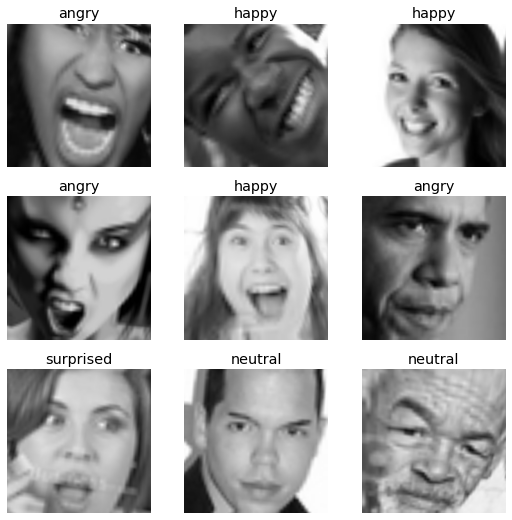

In [15]:
dls.show_batch()

In [16]:
!pip install huggingface_hub["fastai"]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
learn = cnn_learner(dls, models.vgg16_bn,metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64

  0%|          | 0.00/528M [00:00<?, ?B/s]

In [18]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.901074,1.556522,0.591360,1:30:01


epoch,train_loss,valid_loss,error_rate,time
0,1.264531,1.155220,0.437554,10:42
1,1.053263,1.009898,0.379376,10:42
2,0.925656,0.922884,0.349068,10:42
3,0.844545,0.910481,0.342101,10:42


In [19]:
interp = Interpretation.from_learner(learn)

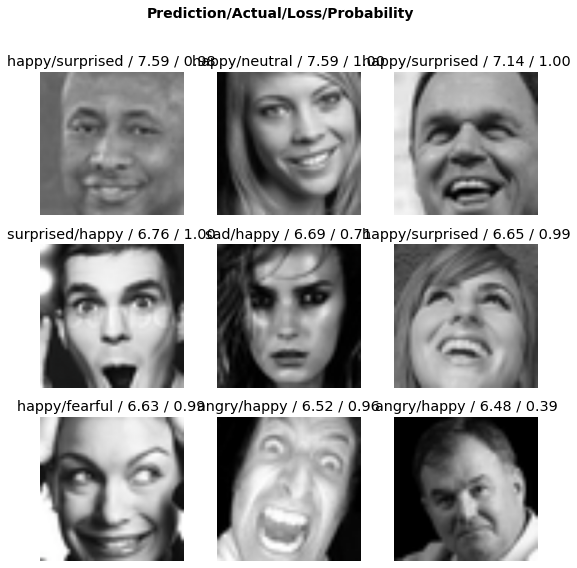

In [20]:
interp.plot_top_losses(9)

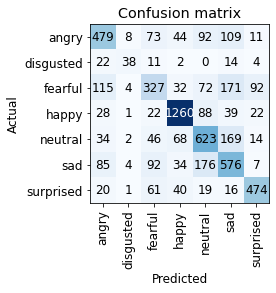

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [22]:
learn.export("vgg16.pkl")